<a href="https://colab.research.google.com/github/rifqirahmandito/obspy_basics/blob/main/obspy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from obspy import read

st = read('/content/2022-08-01_05-51-16-MP.msd')
st

# data used courtesy of BPPTKG Yogyakarta

6 Trace(s) in Stream:
VG.MELAB.00.HHE | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples
VG.MELAB.00.HHN | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples
VG.MELAB.00.HHZ | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples
VG.MEPAS.00.HHE | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples
VG.MEPAS.00.HHN | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples
VG.MEPAS.00.HHZ | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples

data di atas menunjukkan bahwa terdapat 6 trace dengan rincian sebagai berikut:
- 3 trace dari seismometer 3 komponen stasiun Merapi PAS (MEPAS)
- 3 trace dari seismometer 3 komponen stasiun Merapi LAB (MELAB)

seismometer 3 komponen merekam event pada arah:
- utara-selatan (HHN)
- timur-barat (HHE)
- vertikal (HHZ)

kita bisa cek ada berapa trace dalam suatu stream dengan melihat panjang stream tersebut

In [27]:
print(len(st))

6



apabila kita hanya ingin mengambil trace komponen vertikal dari stasiun MEPAS, kita bisa menggunakan stream.select()

In [32]:
st = st.select(station='MEPAS', channel='HHZ')
st

1 Trace(s) in Stream:
VG.MEPAS.00.HHZ | 2022-08-01T05:51:11.000000Z - 2022-08-01T05:51:41.000000Z | 100.0 Hz, 3001 samples

kemudian kita assign trace tersebut ke dalam variable baru dengan mengakses komponen pertama dan satu-satunya dalam stream baru kita yang sudah dipilih stasiun dan channel-nya

In [33]:
tr = st[0]

meta data trace seismik dapat diakses menggunakan trace.stats

In [34]:
print(tr.stats)

         network: VG
         station: MEPAS
        location: 00
         channel: HHZ
       starttime: 2022-08-01T05:51:11.000000Z
         endtime: 2022-08-01T05:51:41.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 11, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 33280})


nilai amplitudo seismogram dapat diakses dalam bentuk array menggunakan trace.data

In [35]:
print(tr.data)

[-374 -324 -197 ... -208 -182 -314]


In [36]:
print(len(tr.data))

3001


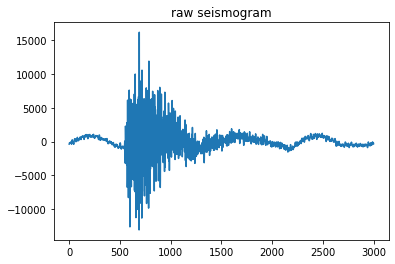

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(tr.data)
ax.set_title('raw seismogram')
plt.show()

nilai waktu suatu seismogram juga dapat diakses dalam berbagai format waktu menggunakan trace.times(), secara default isi array tersebut adalah berapa detik relatif terhadap waktu awal seismogram (trace.stats.starttime)

In [50]:
print(tr.times())

[0.000e+00 1.000e-02 2.000e-02 ... 2.998e+01 2.999e+01 3.000e+01]


In [51]:
print(tr.times('utcdatetime'))

[UTCDateTime(2022, 8, 1, 5, 51, 11)
 UTCDateTime(2022, 8, 1, 5, 51, 11, 10000)
 UTCDateTime(2022, 8, 1, 5, 51, 11, 20000) ...
 UTCDateTime(2022, 8, 1, 5, 51, 40, 980000)
 UTCDateTime(2022, 8, 1, 5, 51, 40, 990000)
 UTCDateTime(2022, 8, 1, 5, 51, 41)]
